In [10]:
!pip install catboost
!pip install dask


In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report


In [12]:
# Load breast cancer dataset
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [13]:
X.shape

(569, 30)

In [14]:
X.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
138,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.086240,0.1957,0.06216,...,18.55,21.43,121.40,971.4,0.14110,0.21640,0.33550,0.16670,0.3414,0.07147
310,11.700,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.011480,0.1936,0.06128,...,12.61,26.55,80.92,483.1,0.12230,0.10870,0.07915,0.05741,0.3487,0.06958
228,12.620,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.020360,0.1514,0.06019,...,14.20,31.31,90.67,624.0,0.12270,0.34540,0.39110,0.11800,0.2826,0.09585
280,19.160,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.096640,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.17820,0.38410,0.57540,0.18720,0.3258,0.09720
144,10.750,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,11.95,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769
221,13.560,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.13760,0.26980,0.25770,0.09090,0.3065,0.08177
299,10.510,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.018750,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
66,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.015040,0.1717,0.06899,...,10.41,31.56,67.03,330.7,0.15480,0.16640,0.09412,0.06517,0.2878,0.09211
157,16.840,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.027710,0.1844,0.05268,...,18.22,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972
367,12.210,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.020270,0.1695,0.05916,...,14.29,24.04,93.85,624.6,0.13680,0.21700,0.24130,0.08829,0.3218,0.07470


In [15]:
X.isnull().sum().sum()

0

In [16]:
X.duplicated().sum()

0

In [17]:
col = X.columns
print(col)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Evaluating SVM:
SVM F1-score: 0.9861


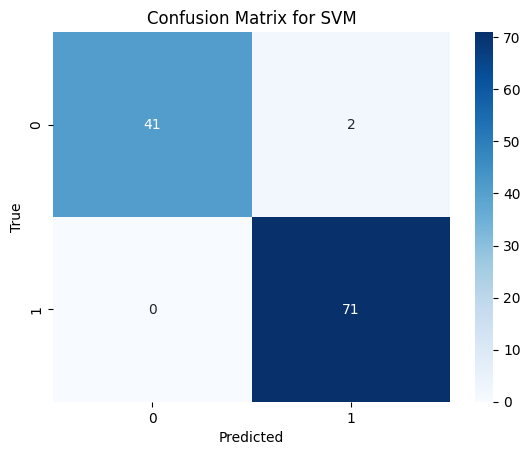

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [20]:
# 1. Support Vector Machine (SVM)
print("Evaluating SVM:")
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate F1-score
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM F1-score: {f1_svm:.4f}")

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(f"SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


Evaluating Optimized SVM with PCA Components Between 5 to 11:
Best parameters found: {'svm__kernel': 'linear', 'svm__gamma': 0.01, 'svm__degree': 3, 'svm__C': 0.1, 'pca__n_components': 9}
SVM with Optimized PCA F1-score: 0.9930


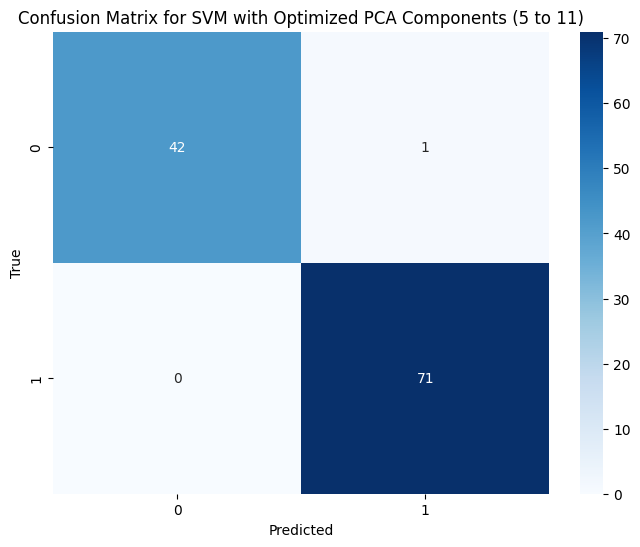

SVM with Optimized PCA Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [25]:
# Define a pipeline including scaling, PCA, and SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC(probability=True, random_state=42, class_weight='balanced'))
])

# Define parameter grid for PCA and SVM
param_grid = {
    'pca__n_components': list(range(5, 12)),
    'svm__C': [0.1, 1, 10, 50, 100],
    'svm__kernel': ['rbf', 'linear'],
    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'svm__degree': [2, 3, 4]
}

# Perform RandomizedSearchCV with the defined pipeline and parameter grid
random_search_svm = RandomizedSearchCV(
    svm_pipeline,
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    random_state=42,
    n_iter=50,
    verbose=1
)

# Evaluate the optimized SVM with different PCA components
print("Evaluating Optimized SVM with PCA Components Between 5 to 11:")
random_search_svm.fit(X_train_scaled, y_train)

# Use the best estimator from randomized search
svm_model_optimized = random_search_svm.best_estimator_
y_pred_svm_optimized = svm_model_optimized.predict(X_test_scaled)

# Output the best parameters found
print(f"Best parameters found: {random_search_svm.best_params_}")

# Calculate F1-score
f1_svm_optimized = f1_score(y_test, y_pred_svm_optimized)
print(f"SVM with Optimized PCA F1-score: {f1_svm_optimized:.4f}")

# Confusion matrix
cm_svm_optimized = confusion_matrix(y_test, y_pred_svm_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_optimized, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for SVM with Optimized PCA Components (5 to 11)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(f"SVM with Optimized PCA Classification Report:\n", classification_report(y_test, y_pred_svm_optimized))


Evaluating Optimized LightGBM with PCA Components Between 5 to 22:
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'pca__n_components': 5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05}
LightGBM with Optimized PCA F1-score: 0.9577


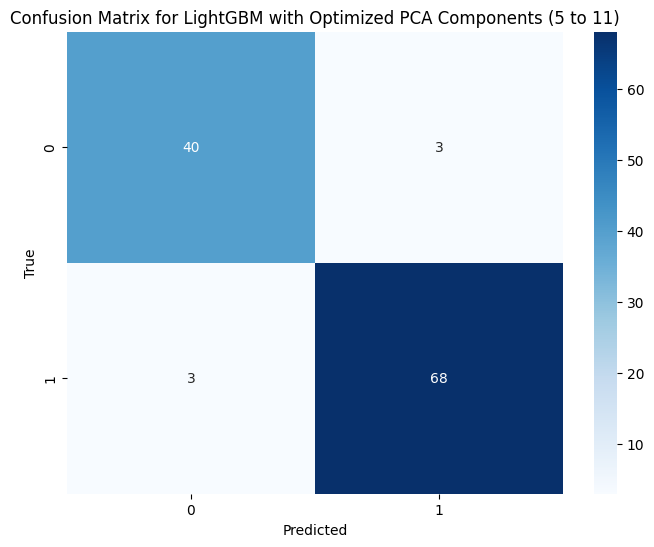

LightGBM with Optimized PCA Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [26]:

# LightGBM
# Define a pipeline including scaling, PCA, and LightGBM
lgbm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),  # PCA will be optimized
    ('lgbm', LGBMClassifier(verbose=-1, random_state=42))
])

# Define parameter grid for PCA and LightGBM
param_grid = {
    'pca__n_components': list(range(5, 12)),
    'lgbm__n_estimators': [50, 100, 200],
    'lgbm__max_depth': [3, 5, 7],
    'lgbm__learning_rate': [0.01, 0.05, 0.1]
}

# Perform RandomizedSearchCV with the defined pipeline and parameter grid
random_search_lgbm = RandomizedSearchCV(
    lgbm_pipeline,
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    random_state=42,
    n_iter=50,
    verbose=1
)

# Evaluate the optimized LightGBM with different PCA components
print("Evaluating Optimized LightGBM with PCA Components Between 5 to 11:")
random_search_lgbm.fit(X_train_scaled, y_train)

# Use the best estimator from randomized search
lgbm_model_optimized = random_search_lgbm.best_estimator_
y_pred_lgbm_optimized = lgbm_model_optimized.predict(X_test_scaled)

# Output the best parameters found
print(f"Best parameters found: {random_search_lgbm.best_params_}")

# Calculate F1-score
f1_lgbm_optimized = f1_score(y_test, y_pred_lgbm_optimized)
print(f"LightGBM with Optimized PCA F1-score: {f1_lgbm_optimized:.4f}")

# Confusion matrix
cm_lgbm_optimized = confusion_matrix(y_test, y_pred_lgbm_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm_optimized, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for LightGBM with Optimized PCA Components (5 to 11)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(f"LightGBM with Optimized PCA Classification Report:\n", classification_report(y_test, y_pred_lgbm_optimized))



Evaluating Optimized CatBoost with PCA Components Between 5 to 11:
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'pca__n_components': 11, 'catboost__learning_rate': 0.1, 'catboost__iterations': 200, 'catboost__depth': 6}
CatBoost with Optimized PCA F1-score: 0.9718


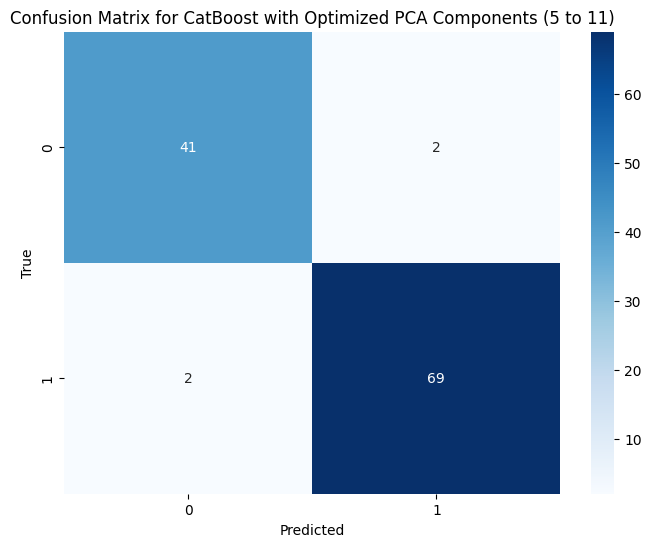

CatBoost with Optimized PCA Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [24]:

# CatBoost
catboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),  # PCA will be optimized
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
])

# Define parameter grid for PCA and CatBoost
param_grid = {
    'pca__n_components': list(range(5, 12)),  # Test PCA components between 5 to 11
    'catboost__iterations': [100, 200, 300],
    'catboost__depth': [4, 6, 8],
    'catboost__learning_rate': [0.01, 0.05, 0.1]
}

# Perform RandomizedSearchCV with the defined pipeline and parameter grid
random_search_catboost = RandomizedSearchCV(
    catboost_pipeline,
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    random_state=42,
    n_iter=50,
    verbose=1
)

# Evaluate the optimized CatBoost with different PCA components
print("Evaluating Optimized CatBoost with PCA Components Between 5 to 11:")
random_search_catboost.fit(X_train_scaled, y_train)

# Use the best estimator from randomized search
catboost_model_optimized = random_search_catboost.best_estimator_
y_pred_catboost_optimized = catboost_model_optimized.predict(X_test_scaled)

# Output the best parameters found
print(f"Best parameters found: {random_search_catboost.best_params_}")

# Calculate F1-score
f1_catboost_optimized = f1_score(y_test, y_pred_catboost_optimized)
print(f"CatBoost with Optimized PCA F1-score: {f1_catboost_optimized:.4f}")

# Confusion matrix
cm_catboost_optimized = confusion_matrix(y_test, y_pred_catboost_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost_optimized, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for CatBoost with Optimized PCA Components (5 to 11)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(f"CatBoost with Optimized PCA Classification Report:\n", classification_report(y_test, y_pred_catboost_optimized))
